<a href="https://colab.research.google.com/github/Jim030123/123456/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install Pillow

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7d3e09672160>

In [3]:
import requests

# URL of the image (replace with your desired image URL)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Download the image
response = requests.get(image_url, stream=True)
if response.status_code == 200:
    with open("original_image.png", "wb") as file:
        file.write(response.content)
else:
    print("Failed to download the image.")


Failed to download the image.


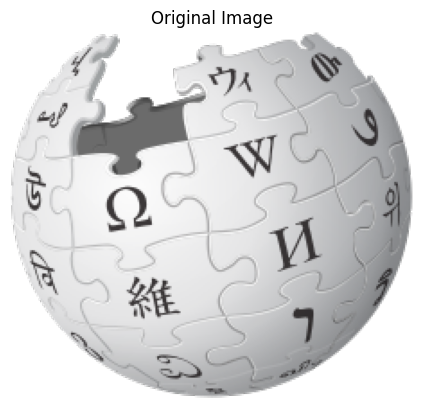

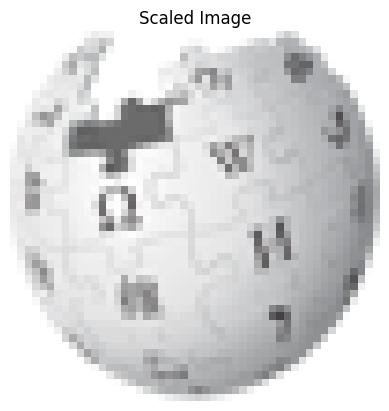

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'  # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Scale the image
new_size = (50, 50)  # Replace with your desired size
scaled_img = img.resize(new_size)

# Display the scaled image
plt.imshow(scaled_img)
plt.title('Scaled Image')
plt.axis('off')
plt.show()

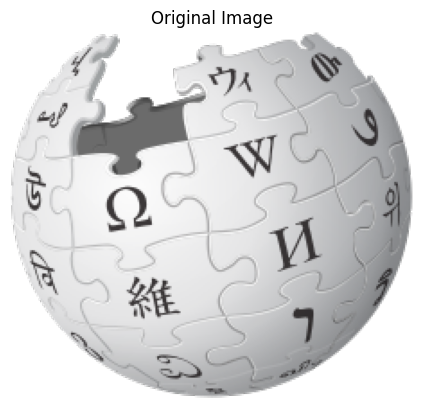

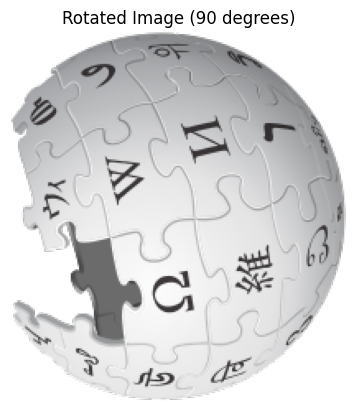

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'  # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Rotate the image 90 degrees
rotated_img = img.rotate(90, expand=True)

# Display the rotated image
plt.imshow(rotated_img)
plt.title('Rotated Image (90 degrees)')
plt.axis('off')
plt.show()


In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Define the URLs of two Creative Commons images
url1 = 'https://upload.wikimedia.org/wikipedia/commons/4/4f/Iconic_image_of_Mount_Fuji.jpg'  # Replace with your image URL
url2 = 'https://upload.wikimedia.org/wikipedia/commons/a/a7/Blue_Mountains_Overlooking_Sydney.jpg'  # Replace with your image URL

# Load the images from URLs and check if the content is valid
def load_image_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        try:
            return Image.open(BytesIO(response.content))
        except Exception as e:
            print(f"Error loading image from {url}: {e}")
            return None
    else:
        print(f"Failed to retrieve image from {url}")
        return None

img1 = load_image_from_url(url1)
img2 = load_image_from_url(url2)

if img1 and img2:
    # Combine the images vertically (side by side)
    combined_img = Image.new('RGB', (max(img1.width, img2.width), img1.height + img2.height))
    combined_img.paste(img1, (0, 0))
    combined_img.paste(img2, (0, img1.height))

    # Display the combined image
    plt.imshow(combined_img)
    plt.title('Combined Image')
    plt.axis('off')
    plt.show()

    # Save the combined image as JPG and trigger the download
    combined_img.save('/mnt/data/combined_image.jpg', 'JPEG')
else:
    print("Failed to load one or both images.")


Failed to retrieve image from https://upload.wikimedia.org/wikipedia/commons/4/4f/Iconic_image_of_Mount_Fuji.jpg
Failed to retrieve image from https://upload.wikimedia.org/wikipedia/commons/a/a7/Blue_Mountains_Overlooking_Sydney.jpg
Failed to load one or both images.


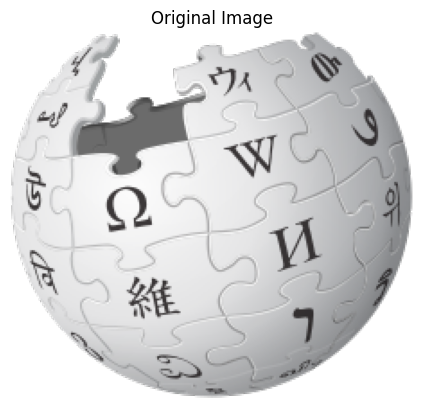

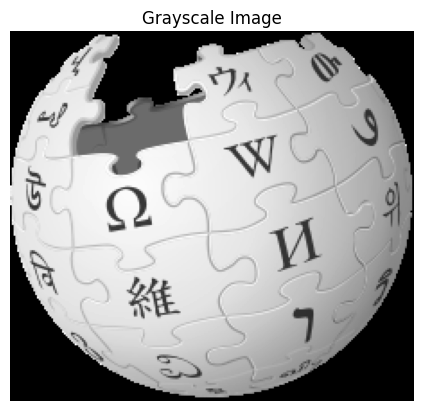

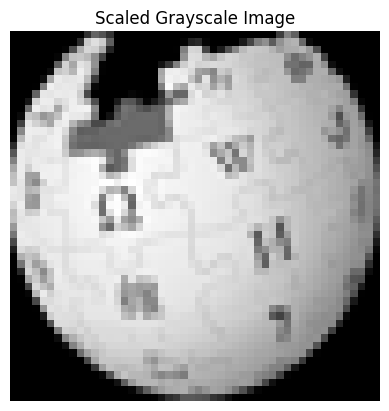

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'  # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Convert the image to grayscale
gray_img = img.convert('L')

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Scale the grayscale image
new_size = (50, 50)  # Replace with your desired size
scaled_gray_img = gray_img.resize(new_size)

# Display the scaled grayscale image
plt.imshow(scaled_gray_img, cmap='gray')
plt.title('Scaled Grayscale Image')
plt.axis('off')
plt.show()


(-0.5, 224.5, 565.5, -0.5)

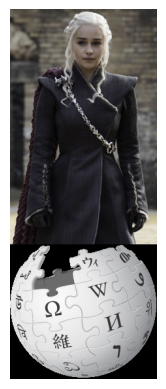

In [5]:

#Q3
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    return Image.open(BytesIO(response.content))

# URLs of the Creative Commons images
image_url1 = 'https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de'
image_url2 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'

# Download the images
img1 = download_image(image_url1)
img2 = download_image(image_url2)

# Ensure both images have the same width
width = min(img1.width, img2.width)
img1 = img1.resize((width, int(img1.height * width / img1.width)))
img2 = img2.resize((width, int(img2.height * width / img2.width)))

# Combine images vertically
combined_height = img1.height + img2.height
combined_img = Image.new('RGB', (width, combined_height))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

# Display the combined image
plt.imshow(combined_img)
plt.axis('off')

In [7]:
#Q1
import requests
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    image = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# URL of the image
image_url = 'https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de'

# Download the image
image = download_image(image_url)

# Convert the image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the Mediapipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=1)

# Process the image
result = mp_selfie_segmentation.process(image_rgb)

# Create a mask and apply it
mask = result.segmentation_mask > 0.1  # Threshold for background removal
image_no_bg = image_rgb.copy()
image_no_bg[~mask] = [255, 255, 255]  # Set background to white

# Display the result
plt.imshow(image_no_bg)
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'mediapipe'